## Setup

In [10]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import pandas as pd
import numpy as np
import os

# To make this notebook's output stable across runs
np.random.seed(42)

# To plot the figures
import matplotlib as mlp 
import matplotlib.pyplot as plt
mlp.rc('axes', labelsize=14)
mlp.rc('xtick', labelsize=12)
mlp.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "../"
IMAGES_PATH = "images"
os.makedirs(IMAGES_PATH, exist_ok=True)

# Function to save the figures
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300, figure=None):
    path = os.path.join(IMAGES_PATH, (fig_id + "." + fig_extension))
    print('Saving figure', fig_id)
    if tight_layout:
        plt.tight_layout()

    if figure is None:
        plt.savefig(path, format=fig_extension, dpi=resolution)
    else:
        figure.savefig(path, format=fig_extension, dpi=resolution)


## Get the  data

In [11]:
DATASETS_PATH = os.path.join(PROJECT_ROOT_DIR, 'datasets')
os.makedirs(DATASETS_PATH, exist_ok=True)

DATASET_NAME = 'dados 2-4.txt'

# columns names for the dataset
columns=['Distance','RSSI']

def load_data(data_path = DATASETS_PATH, dataset_name= DATASET_NAME, columns_names=columns):
    txt_path = os.path.join(data_path, dataset_name)
    return pd.read_table(txt_path, names=columns)

# read the dataset
data_2_4_Ghz = load_data(data_path=DATASETS_PATH, dataset_name=DATASET_NAME, columns_names=columns)
data_2_4_Ghz.head()


,Distance,RSSI
0,1,-21.0
1,2,-30.0
2,3,-29.0
3,4,-33.0
4,5,-32.0


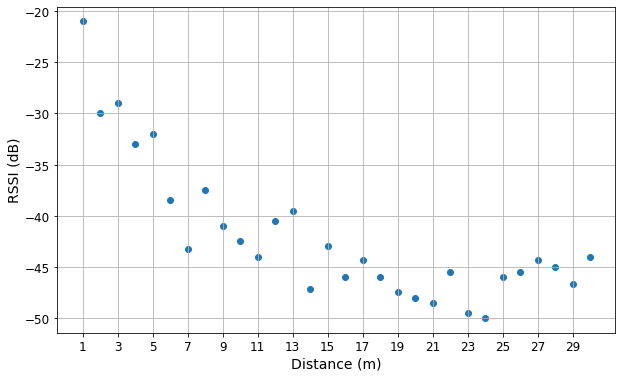

In [12]:
# Show the RSSI behavior in function of the distance
plt.figure(figsize=(10,6))
plt.scatter(data_2_4_Ghz['Distance'], data_2_4_Ghz['RSSI'], label='2.4 GHz')
plt.ylabel('RSSI (dB)')
plt.xlabel('Distance (m)')
plt.xticks(np.arange(1,30,2))
plt.grid()
plt.show()

## Split the data

In [13]:
# Split the data in 3 distances (near, medium, far)
near_data = data_2_4_Ghz[:10]
medium_data = data_2_4_Ghz[10:20]
far_data = data_2_4_Ghz[20:30]

## Optimized Path Loss Equation

In [18]:
# Function to calculate the RSSI using the Optimized Path Loss Equation
def calculate_rssi_with_optimized_path_loss_function(frequency, d):

    # Transmit power
    Pt = 10 * np.log10(250) + 5 + 1
    # Reference distance
    d0 = 1

    # Free-space path loss model
    Ao = 32.44+20*np.log10(d0/1000)+20*np.log10(frequency)

    # Optimized coefficients
    n = 1.7143
    k = 13.3156

    # Optimized Path Loss
    L = Ao + 10*n*np.log10(d/d0) + k

    # Received Power According to the Optimized Path Loss
    Pr = Pt - L
    
    return Pr

## Load the Trained Models

In [15]:
import joblib

# Loads the trained models
lin_reg = joblib.load('models/lin_reg.pkl')
tree_reg_best = joblib.load('models/tree_reg_best.pkl')
forest_reg_best = joblib.load('models/forest_reg_best.pkl')

## Analyzing the Metrics in the Split datas

### Near Distance

In [ ]:
# Creates the feature and labels for the near distance datas
X_near = near_data.drop(['RSSI'],axis=1)
y_near = near_data['RSSI']

#### Optimized Path Loss Equation

In [36]:
# Frequency
frequency = 2412
# Calculates the RSSI using the optimized path loss equation
path_loss_opt_near_prediction = calculate_rssi_with_optimized_path_loss_function(frequency, X_near)
print(path_loss_opt_near_prediction)

    Distance
0 -23.423746
1 -28.584303
2 -31.603036
3 -33.744860
4 -35.406189
5 -36.763593
6 -37.911262
7 -38.905418
8 -39.782325
9 -40.566746


#### Linear Model

In [37]:
# Predict RSSI in the near distance using the linear model
lin_reg_near_prediction = lin_reg.predict(X_near)
lin_reg_near_prediction

array([-32.22949888, -32.86867158, -33.50784428, -34.14701698,
       -34.78618968, -35.42536238, -36.06453507, -36.70370777,
       -37.34288047, -37.98205317])

#### Decision Tree Model

In [39]:
# Predict RSSI in the near distance using the tree model
tree_reg_near_prediction = tree_reg_best.predict(X_near)
tree_reg_near_prediction

array([-29.        , -29.        , -29.        , -29.        ,
       -29.        , -39.75      , -39.75      , -39.75      ,
       -39.75      , -41.33333333])

#### Random Forest Model

In [42]:
# Predict RSSI in the near distance using the random forest model
forest_reg_near_prediction = forest_reg_best.predict(X_near)
forest_reg_near_prediction

array([-28.3972995 , -28.3972995 , -29.38352757, -30.72488722,
       -32.87131266, -37.33063127, -39.83672776, -39.66721021,
       -40.0520849 , -41.26054781])

#### Evaluates the Predictions

In [ ]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

In [44]:
# Metrics of the optimized path loss equation

# R22 and RMSE of the optimized path loss
path_loss_opt_rmse = root_mean_squared_error(y_near, path_loss_opt_near_prediction)
path_loss_opt_mae = mean_absolute_error(y_near, path_loss_opt_near_prediction)
path_loss_opt_r2 = r2_score(y_near, path_loss_opt_near_prediction)

print(f'RMSE (Path Loss Optimized): {path_loss_opt_rmse}')
print(f'MAE (Path Loss Optimized): {path_loss_opt_mae}')
print(f'R2 (Path Loss Optimized): {path_loss_opt_r2}')

RMSE (Path Loss Optimized): 2.5597678325011306
MAE (Path Loss Optimized): 2.2225019392052503
R2 (Path Loss Optimized): 0.8538407315020138


In [40]:
# Metrics of the linear models

# RSME, MAE and R2 of the linear model
lin_reg_rmse = root_mean_squared_error(y_near, lin_reg_near_prediction)
lin_reg_mae = mean_absolute_error(y_near, lin_reg_near_prediction)
lin_reg_r2 = r2_score(y_near, lin_reg_near_prediction)

print(f'RSME ({lin_reg.named_steps["linear_regression"].__class__.__name__}): {lin_reg_rmse}')
print(f'MAE ({lin_reg.named_steps["linear_regression"].__class__.__name__}): {lin_reg_mae}')
print(f'R2 ({lin_reg.named_steps["linear_regression"].__class__.__name__}): {lin_reg_r2}')

RSME (LinearRegression): 5.09151090962618
MAE (LinearRegression): 4.177068252326784
R2 (LinearRegression): 0.4217461089859351


In [41]:
# Metrics of the tree model

# RSME, MAE and R2 of the Decision Tree model
tree_reg_rmse = root_mean_squared_error(y_near, tree_reg_near_prediction)
tree_reg_mae = mean_absolute_error(y_near, tree_reg_near_prediction)
tree_reg_r2 = r2_score(y_near, tree_reg_near_prediction)

print(f'RSME ({tree_reg_best.named_steps["tree_regression"].__class__.__name__}): {tree_reg_rmse}')
print(f'MAE ({tree_reg_best.named_steps["tree_regression"].__class__.__name__}): {tree_reg_mae}')
print(f'R2 ({tree_reg_best.named_steps["tree_regression"].__class__.__name__}): {tree_reg_r2}') 

RSME (DecisionTreeRegressor): 3.3436299303468244
MAE (DecisionTreeRegressor): 2.5416666666666665
R2 (DecisionTreeRegressor): 0.7506200033769079


In [43]:
# Metrics of the tree model

# RSME, MAE and R2 of the Random Forest model
forest_reg_rmse = root_mean_squared_error(y_near, forest_reg_near_prediction)
forest_reg_mae = mean_absolute_error(y_near, forest_reg_near_prediction)
forest_reg_r2 = r2_score(y_near, forest_reg_near_prediction)

print(f'RSME ({forest_reg_best.named_steps["random_forest"].__class__.__name__}): {forest_reg_rmse}')
print(f'MAE ({forest_reg_best.named_steps["random_forest"].__class__.__name__}): {forest_reg_mae}')
print(f'R2 ({forest_reg_best.named_steps["random_forest"].__class__.__name__}): {forest_reg_r2}')

RSME (RandomForestRegressor): 2.8899920693506527
MAE (RandomForestRegressor): 2.14671714912281
R2 (RandomForestRegressor): 0.8136975747960313


In [47]:
# Plot the R2

def plot_r2(y_test, model_prediction, model_name, color='blue'):
    
    # Values of the RSSI to create the line of the R2=1 which is the ideal value
    rssi_values = np.linspace(-55, -20, 30)
    
    figure = plt.figure(figsize=(10,6))
    plt.scatter(y_test, model_prediction, marker='o', s=30, color=color, label=model_name)
    plt.plot(rssi_values, rssi_values, color='black', linestyle='--', label=r'$R^2=1$ (Caso ideal)')
    plt.xlabel('RSSI real', fontsize=15)
    plt.ylabel('RSSI previsto', fontsize=15)
    plt.legend(loc='best', fontsize=13)
    plt.xlim(-55, -20)
    plt.ylim(-55, -20)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.grid()
    plt.show()

    return figure

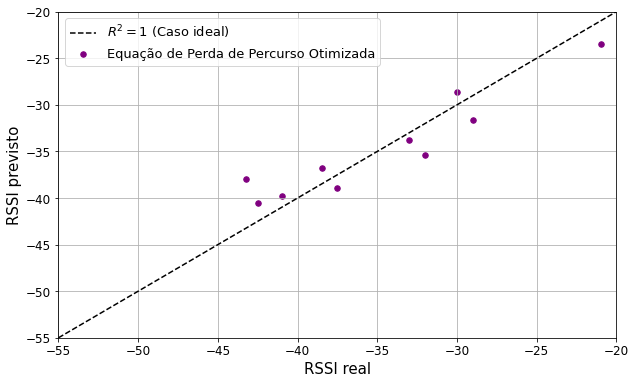

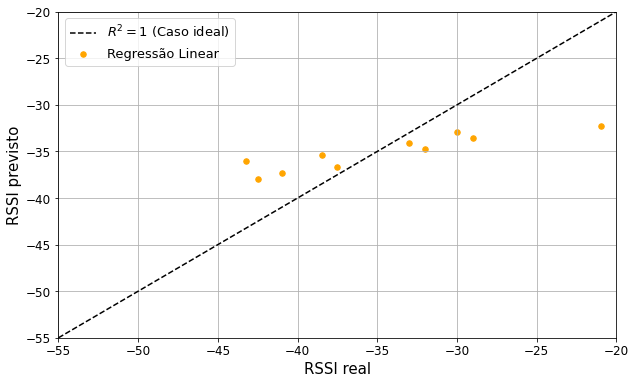

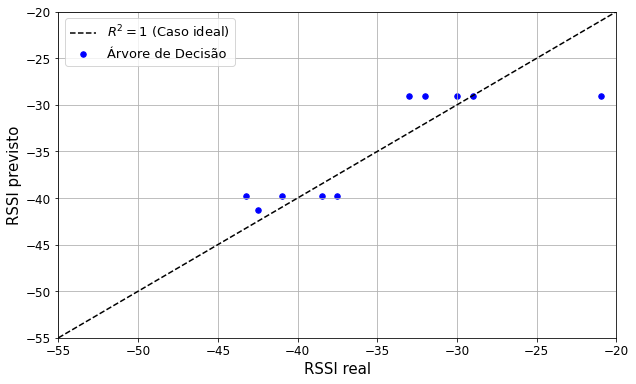

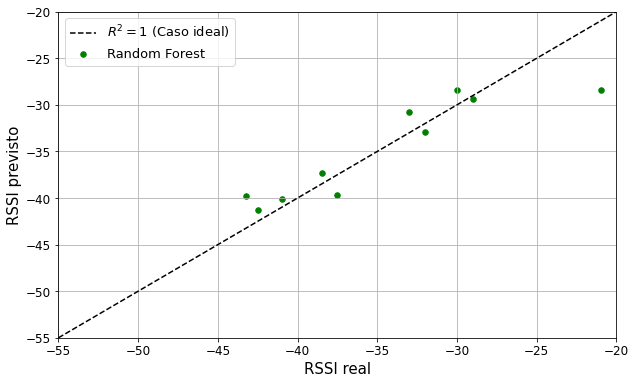

In [48]:
# Plot the R2 of the Optimized Path Loss
fig_r2_path_loss_loss_opt = plot_r2(y_near, path_loss_opt_near_prediction, 'Equação de Perda de Percurso Otimizada', color='purple')
# Plot the R2 of the Linear Model
fig_r2_lin_reg = plot_r2(y_near, lin_reg_near_prediction, 'Regressão Linear', color='orange')
# Plot the R2 of the Decision Tree Model
fig_r2_tree_reg = plot_r2(y_near, tree_reg_near_prediction, 'Árvore de Decisão', color='blue')
# Plot the R2 of the Random Forest Model
fig_r2_forest_reg = plot_r2(y_near, forest_reg_near_prediction, 'Random Forest', color='green')